### Задача 1
Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

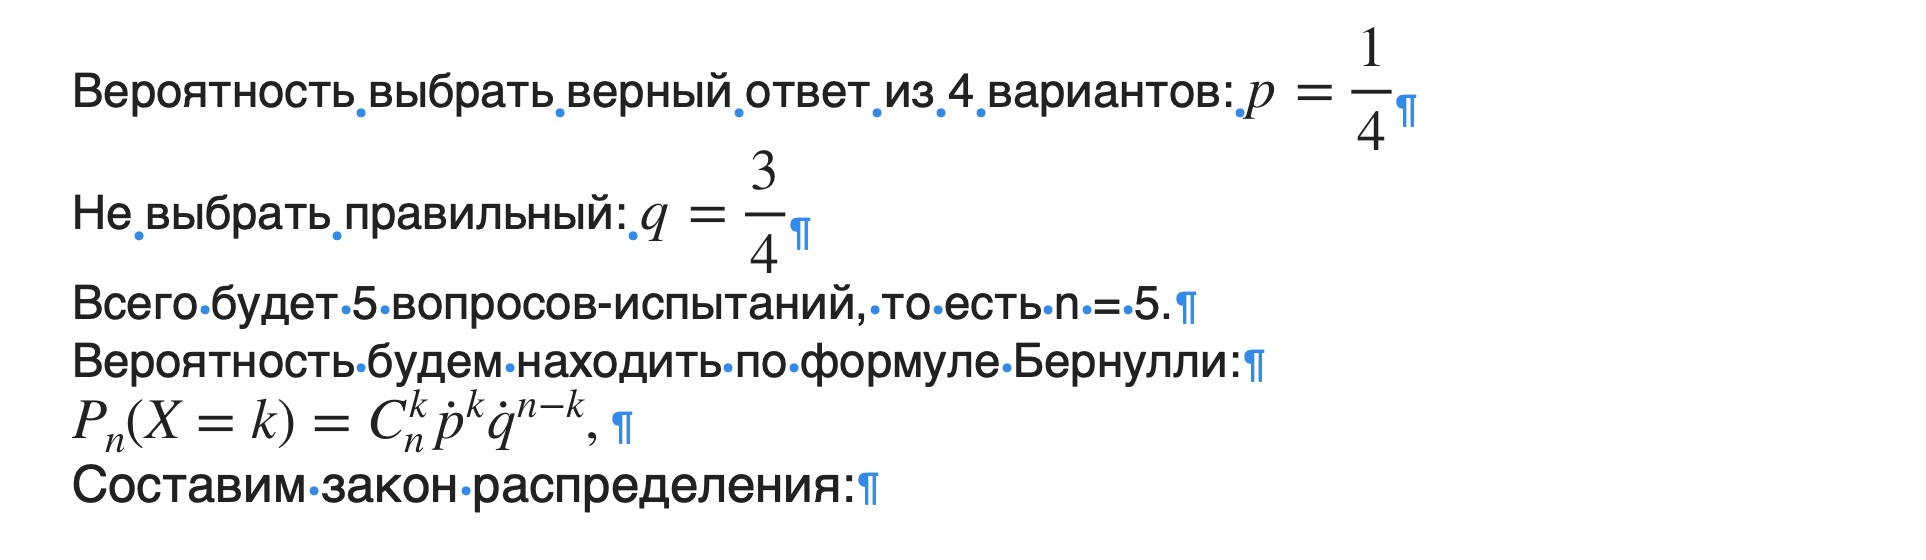

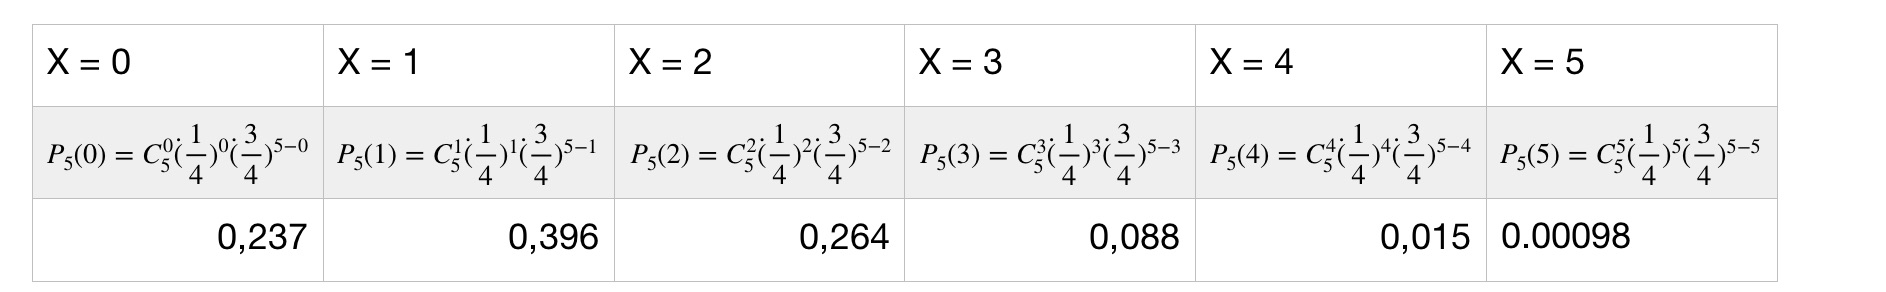

Мат ожидание :
M(X) = np = 5 * 0.25 = 1, 25, то есть в среднем из 5 вопросов ученик случайным образом может правильно ответить на один. 
Дисперсия:
D(X) = npq = 5 * 0.25 * 0,75 = 0,938, это значит что в худшем варианте вероятнее всего ученик на один ответ провалится, а в лучшем у него будет два правильных ответа.


### Задача 2
Вероятность попадания в цель при одном выстреле равна 0.01. Какова вероятность того, что число попаданий при 200 выстрелах будет не менее 5 и не более 10?


In [2]:
import scipy

In [9]:
from scipy import special
n = 200
k_5 = 5
k_10 = 10
p = 0.01
# вероятность попадания не менее 5 но и не более 10 раз, значит, что мы ищем сумму вероятностей попаданий 5 раз,
# 6, 7, 8, 9 и 10:
P = 0
for k in range(k_5, k_10 +1):
    C = scipy.special.binom(n, k)
    P += C * (p**k) * (1 - p)**(n - k)
print(f'Вероятность того, что число попаданий при 200 выстрелах будет не менее 5 и не более 10 = {P}')

Вероятность того, что число попаданий при 200 выстрелах будет не менее 5 и не более 10 = 0.051739381860374606


### Задача 3
В условиях предыдущей задачи сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 10 раз будет совершено попадание?
Подсказка. Как посчитать P(X >= k) для величины X, имеющей распределение Пуассона? Здесь предстоит немножко покодить.

Используем для решения формулу Пуассона:
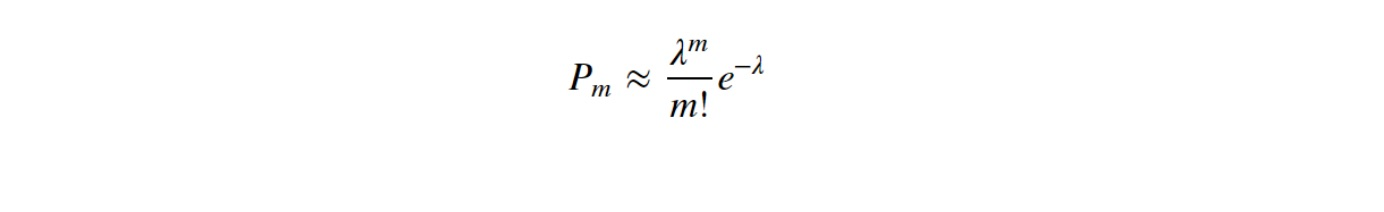

Нам нужно найти такой параметр n при котором P_m будет равно 0.9. 

In [45]:
# Не знаю как решить это уравнение аналитически, поэтому буду перебирать n до тех пор,
# пока следующее выражение не станет правдой, при этом в прошлом задании можно заметить что n = 200 будет
# маловато для почти точных 10 попаданий. Поэтому начнем перебирать с 200.
# вероятность попасть хотя бы 10 раз равна 1 - сумма вероятностей попасть 0, 1, 2 ... 9 раз,
# P(X >=10) = 1 - (P(k=0) +P(k = 1)+ P(k = 2) +P(k = 3) + P(k = 4) + P(k = 5) +P(k = 6)+ P(k = 7) + P(k = 8) +P(k = 9))
# То есть сумма этих вероятностей должна быть меньше 0.1
import math
import numpy as np
p = 0.01

for n in range(200, 2000):
    lmbda = n * p
    P = 1 - sum([lmbda**k * np.exp(-lmbda) / np.math.factorial(k) for k in range(10)])    
    if P >=0.9:
        print(n)
        break

1421


Ответ: 1421 выстрел нужно сделать, чтобы попасть не менее 10 раз с 90% вероятностью. 